In [2]:
import torch
import torch.nn.functional as F

from models.lm import load_model

from eval import eval_hashhop, eval_copy

from hashhop.hashhop import HashHopSampler, hh_to_string

In [5]:
model = load_model("runs/fiery-violet-5", "cuda")
model_generate = model.setup_generation(sample=True)

In [15]:
success = eval_hashhop(model_generate, hops=None, n_tasks=2048, batch_size=256, max_tokens=256, max_hops=2, cot=True, hash_len=8, vocab_size=52, verbose=False)
success

0.986328125

In [30]:
model = load_model("runs/bumbling-haze-20", "cuda")
model_generate = model.setup_generation(sample=False)

In [31]:
success = eval_copy(model_generate, n_tasks=256, batch_size=256, max_tokens=512, vocab_size=52, verbose=False)
success

0.0390625

In [32]:
from copyy.copy import CopySampler, hh_to_string

In [33]:
sampler = CopySampler(max_tokens=512)
prompt, target = sampler.sample(1)

In [34]:
hh_to_string(prompt[0]), hh_to_string(target[0])

('xYgyCGgyRXacdtXpPiFSkCqxMuxjsGhsunwKDervPqiwZytbKEoFhYukXhTlNIDxfNjeZoUIAWrAlJdzfyFfXMbjgYGfTbASxMrkJXrHoEdUicVEzbHKNRbPTITYkDYLNegqivhlJYhbaFKsdJiDfNQwAjVaKDDJkGYgeSpWBXUktdIEurGCLuVKxkjlDXWevQNiqyKrMlZrzqlBxOnCCuZeClievZRizNblftATVkwRTHoroRjKSWJIAZlvlSO>',
 'xYgyCGgyRXacdtXpPiFSkCqxMuxjsGhsunwKDervPqiwZytbKEoFhYukXhTlNIDxfNjeZoUIAWrAlJdzfyFfXMbjgYGfTbASxMrkJXrHoEdUicVEzbHKNRbPTITYkDYLNegqivhlJYhbaFKsdJiDfNQwAjVaKDDJkGYgeSpWBXUktdIEurGCLuVKxkjlDXWevQNiqyKrMlZrzqlBxOnCCuZeClievZRizNblftATVkwRTHoroRjKSWJIAZlvlSO')

In [35]:
hh_to_string(model_generate(prompt, len(target[0]))[0])

'xYgyCGgyRXacdtXpPiFSkCqxMuxjsGhsunwKDervPqiwwZytbKEoFhYukXhTlNIDxfNjeZUIAWrAlJdzfyFfXMbjgYGfTbASxMrkJXrHoEdUicVEzbHKNRbPTITYkDYLNegqivhlJYhbaFKsdJiDfNQwAjVaKDDJkGYgeSpWBXUktdIEurGCLuVKxkjlDXWevQNiqyKrMlZrzqlBxOnCCuZeClievZRizNblftATVkwRTHoroRjKSWJIAZlvlSO'

In [1]:
import numpy as np

In [2]:
list_p_values = np.array([[0.1, 0.1, 0.1, 0.1, 0.1],
                                  [0.2, 0.2, 0.2, 0.2, 0.2]])

list_p_values.shape[0]

In [1]:
import torch

In [2]:
torch.__version__

'2.2.2'

In [3]:
1.8e-3

0.0018

In [5]:
12%12==0

True

In [6]:
a = 0

In [8]:
1/a if 0 else 2

2

In [2]:
import math
import matplotlib.pyplot as plt

In [37]:
alpha = 5
beta3 = 0.999
T = 1000
beta_start = 0.99

def alpha_scheduler(step):
    if step < T:
        return min(step * alpha / T, alpha)
    elif T <= step <= T+200:
        return alpha * (T+200-step)/200
    else:
        return 0

def beta3_scheduler(step):
    return min(math.exp(math.log(beta_start) * math.log(beta3) / ((1 - step / T) * math.log(beta3) + (step / T) * math.log(beta_start))), beta3)

In [38]:
list_alpha = []
list_beta3 = []

for t in range(T+200):
    alpha_t = alpha_scheduler(t)
    beta3_t = beta3_scheduler(t)

    list_alpha.append(alpha_t)
    list_beta3.append(beta3_t)

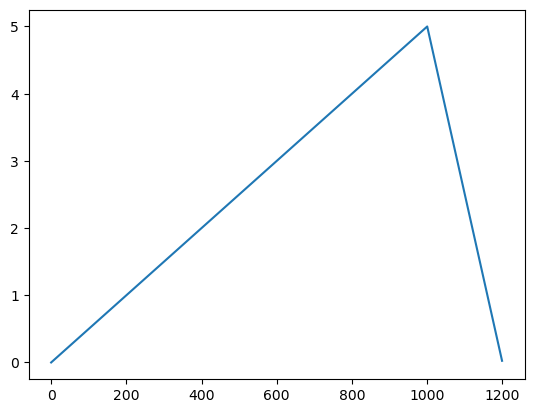

In [39]:
plt.plot(list_alpha)

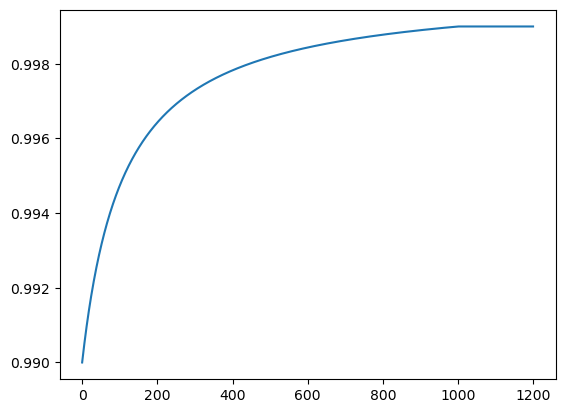

In [40]:
plt.plot(list_beta3)

In [42]:
(3.6e-3)/4

0.0009

In [49]:
2**(-4)

0.0625

In [50]:
1.8e-3

0.0018

In [58]:
2**(-9)

0.001953125

In [59]:
2**(-12)

0.000244140625

In [53]:
2**(-8)

0.00390625

In [54]:
6e-3

0.006

In [55]:
import math

In [56]:
math.log2(6e-3)

-7.380821783940931